# About

Theoretical plots of the analysis pertaining to simplified 2-dim Kuramoto system with adaptive delays and no self-feedback links. Does not require any exported numerical simulations from MATLAB scripts.

Uses the following packages and functions:

funlib:
 - Omega2D
 - eig2D_cubic
 - eig2D_det

# Library

In [1]:
from __future__ import division, print_function

%matplotlib inline
# Toggle on/off
# %matplotlib notebook

import os
import numpy as np
import scipy.io as sio
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.transforms as tsfm
import math
from math import pi

from lib import *

from IPython.display import clear_output

# Generate arrays to plot

## Parameters

In [2]:
g = 1.5
omega0 = w0 = 1.0
gain = 30
tau0 = 0.1

# Parameter dictionary
param = {'g': g,
         'omega0': omega0,
         'gain': gain,
         'tau0': tau0
         }

# Settings
steps = 500

## Synchronization states

In [3]:
# Fixed-point functions
Omega_fun = lambda Omega: funlib.Omega2D(Omega, param)[0]
Omega_fun_noplas = lambda Omega: Omega - w0 + g*np.sin(Omega*tau0)
Delta_fun = lambda Omega: funlib.Omega2D(Omega, param)[1]

# Get all roots of the fixed-point equation in interval
Omega_roots = rootlib.root_on_interval(Omega_fun, w0-g/2, w0+g/2, steps=steps)
Delta_roots = np.zeros(Omega_roots.size)

for i in range(Omega_roots.size):
    Delta_roots[i] = Delta_fun(Omega_roots[i])

# Generate arrays of R_gain to plot
Omega_arr = np.linspace(w0 - g/2, w0 + g/2, num=steps)
R_arr = np.zeros(Omega_arr.size)
R_arr_noplas = np.zeros(Omega_arr.size)

for j in range(Omega_arr.size):
    R_arr[j] = Omega_fun(Omega_arr[j])
    R_arr_noplas[j] = Omega_fun_noplas(Omega_arr[j])

## Roots of cubic polynomial

In [4]:
# Obtain roots of cubic polynomial
cubic_coeffs = lambda Omega: funlib.eig2D_cubic(Omega, Delta_fun(Omega), param)
comp_root = lambda Omega: funlib.quadratic_roots(cubic_coeffs(Omega))

re_roots1 = np.zeros(Omega_arr.size)
re_roots2 = np.zeros(Omega_arr.size)

for k in range(Omega_arr.size):
    new_root = comp_root(Omega_arr[k])
    re_roots1[k] = new_root[0].real
    re_roots2[k] = new_root[1].real

zero_arr = np.zeros(Omega_roots.size)

## Eigenvalues

### Choose two synchronization states for plotting respective eigenvalues.

In [5]:
Omega1 = Omega_roots[0]
Omega2 = Omega_roots[1]

Delta1 = Delta_roots[0]
Delta2 = Delta_roots[1]

# Respective cubic roots
cubic_roots1 = np.roots(cubic_coeffs(Omega1))
cubic_roots2 = np.roots(cubic_coeffs(Omega2))

### Eigenvalue plot for 1st synchronization state

In [6]:
# Ranges
range_u1 = 2
range_v1 = 5

part_u1 = 300
part_v1 = 300

cap1 = 5

# Processing function
z_fun1 = lambda x: x

# Generate error meshes

u_arr1 = np.linspace(-range_u1, range_u1, num=part_u1)
v_arr1 = np.linspace(-range_v1, range_v1, num=part_v1)
v_mesh1, u_mesh1 = np.meshgrid(v_arr1, u_arr1)

err_mesh1 = np.zeros(u_mesh1.shape)
eig_poly1 = lambda z: funlib.eig2D_det(z, Omega1, Delta1, param)

for k in range(u_arr1.size):
    for l in range(v_arr1.size):
        err_mesh1[k,l] = np.min((np.abs(eig_poly1(u_mesh1[k,l] + 1j*v_mesh1[k,l])), cap1))

# Transform err_mesh
z_mesh1 = z_fun1(err_mesh1)
z_mesh1 = z_mesh1 / np.abs(z_mesh1).max()

# Set the limits of the plot to the limits of the data
u_min1 = u_mesh1.min()
u_max1 = u_mesh1.max()
v_min1 = v_mesh1.min()
v_max1 = v_mesh1.max()

### Eigenvalue plot for 2st synchronization state

In [7]:
# Ranges
range_u2 = 6
range_v2 = 5

part_u2 = 300
part_v2 = 300

cap2 = 10

# Processing function
z_fun2 = lambda x: x

# Generate error meshes

u_arr2 = np.linspace(-range_u2, range_u2, num=part_u2)
v_arr2 = np.linspace(-range_v2, range_v2, num=part_v2)
v_mesh2, u_mesh2 = np.meshgrid(v_arr2, u_arr2)

err_mesh2 = np.zeros(u_mesh2.shape)
eig_poly2 = lambda z: funlib.eig2D_det(z, Omega2, Delta2, param)

for k in range(u_arr2.size):
    for l in range(v_arr2.size):
        err_mesh2[k,l] = np.min((np.abs(eig_poly2(u_mesh2[k,l] + 1j*v_mesh2[k,l])), cap2))

# Transform err_mesh
z_mesh2 = z_fun2(err_mesh2)
z_mesh2 = z_mesh2 / np.abs(z_mesh2).max()

# Set the limits of the plot to the limits of the data
u_min2 = u_mesh2.min()
u_max2 = u_mesh2.max()
v_min2 = v_mesh2.min()
v_max2 = v_mesh2.max()

# Generate figure

## Plot options

In [8]:
# Plot positions [left, bottom, width, height] 
bbox0 = [0.15, 0.55, 0.25, 0.3]  # Fig 2a: Synchronization states (roots of R_gain)
bbox1 = [0.15, 0.1, 0.25, 0.3]  # Fig 2b: Non-zero cubic roots (real part)
bbox2 = [0.5, 0.1, 0.15, 0.8] # Fig 2c: Eigenvalue plot of 1st Omega
bbox3 = [0.75, 0.1, 0.15, 0.8] # Fig 2d: Eigenvalue plot of 2nd Omega
bbox4 = [0.92, 0.1, 0.04, 0.8] # Colour legend for fig 2c, fig 2d heatmaps

# Plot options
lw_ab1 = 1.5
lw_ab2 = 0.8
lw_cd = 0.5
ms_b = 10

al_ab = 1.0
al_cd = 0.8

eig_options_line = {'linestyle': 'dashed',
                    'linewidth': lw_cd,
                    'color': 'white'
                    }
eig_options_mark = {'linestyle': 'None',
                    'marker': 'o',
                    'markersize': 4
                    }

tick_fontsize = 8

## Plot figure

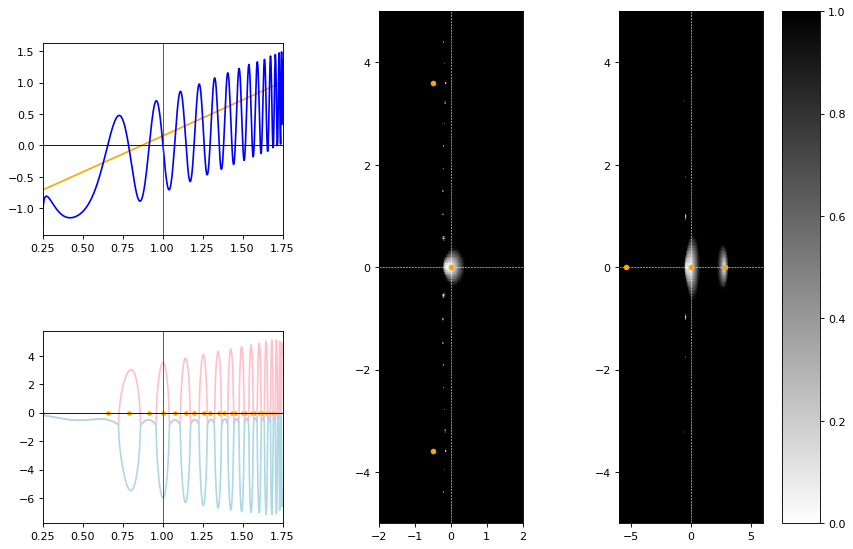

In [9]:
fig, ax = plt.subplots(5, figsize=(12, 8), dpi=80)

# Set positions
ax[0].set_position(bbox0)
ax[1].set_position(bbox1)
ax[2].set_position(bbox2)
ax[3].set_position(bbox3)
ax[4].set_position(bbox4)

# Figure 2a
ax[0].plot(Omega_arr, R_arr_noplas, color='orange', linewidth=lw_ab1, alpha=al_ab)
ax[0].plot(Omega_arr, R_arr, color='blue', linewidth=lw_ab1, alpha=al_ab)

ax[0].axhline(y=0, color='black', linewidth=lw_ab2)
ax[0].axvline(x=w0, color='green', linewidth=lw_ab2)

ax[0].set_xlim(left=w0-g/2, right=w0+g/2)

# ax[0].tick_params(axis='both', which='major', labelsize=tick_fontsize)


# Figure 2b
ax[1].plot(Omega_arr, re_roots1, color='pink', linewidth=lw_ab1, alpha=al_ab)
ax[1].plot(Omega_arr, re_roots2, color='lightblue', linewidth=lw_ab1, alpha=al_ab)

ax[1].scatter(Omega_roots, np.zeros(Omega_roots.size), s=ms_b, color='orange')

ax[1].axhline(y=0, color='black', linewidth=lw_ab2)
ax[1].axvline(x=w0, color='green', linewidth=lw_ab2)

ax[1].set_xlim(left=w0-g/2, right=w0+g/2)


# Figure 2c
c = ax[2].pcolormesh(u_mesh1, v_mesh1, z_mesh1, cmap='binary', vmin=0, vmax=1) # cmap='RdBu'
ax[2].axis([u_min1, u_max1, v_min1, v_max1])
    
ax[2].axhline(y=0, **eig_options_line) # x-axis
ax[2].axvline(x=0, **eig_options_line) # y-axis

ax[2].plot(np.real(cubic_roots1), np.imag(cubic_roots1), color='orange', **eig_options_mark) # Cubic roots


# Figure 2d
ax[3].pcolormesh(u_mesh2, v_mesh2, z_mesh2, cmap='binary', vmin=0, vmax=1) # cmap='RdBu'
ax[3].axis([u_min2, u_max2, v_min2, v_max2])
    
ax[3].axhline(y=0, **eig_options_line) # x-axis
ax[3].axvline(x=0, **eig_options_line) # y-axis

ax[3].plot(np.real(cubic_roots2), np.imag(cubic_roots2), color='orange', **eig_options_mark) # Cubic roots

# Colourbar
fig.colorbar(c, cax=ax[4]) 

In [10]:
print(Omega1, Omega2)

0.657201118777993 0.7878622308066431
